Back to the main [Index](../index.ipynb)

### Combine archives
The experiment, i.e. model with the simulation description, can be stored as Combine Archive.

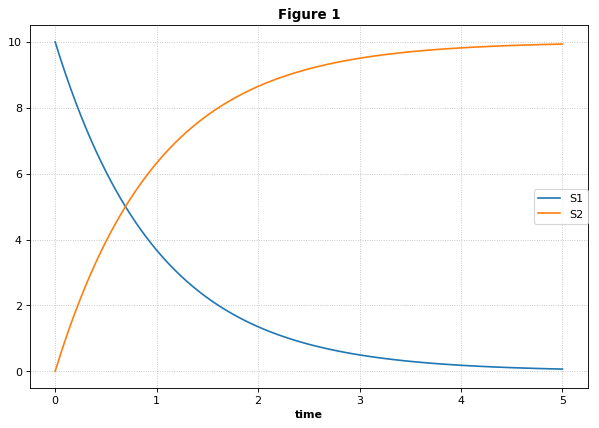

In [1]:
import tellurium as te, tempfile, os
te.setDefaultPlottingEngine('matplotlib')

%matplotlib inline

antimony_str = '''
model myModel
  S1 -> S2; k1*S1
  S1 = 10; S2 = 0
  k1 = 1
end
'''

phrasedml_str = '''
  model1 = model "myModel"
  sim1 = simulate uniform(0, 5, 100)
  task1 = run sim1 on model1
  plot "Figure 1" time vs S1, S2
'''

# create an inline OMEX (inline representation of a COMBINE archive)
# from the antimony and phrasedml strings
inline_omex = '\n'.join([antimony_str, phrasedml_str])

# execute the inline OMEX
te.executeInlineOmex(inline_omex)
# export to a COMBINE archive
workingDir = tempfile.mkdtemp(suffix="_omex")
te.exportInlineOmex(inline_omex, os.path.join(workingDir, 'archive.omex'))

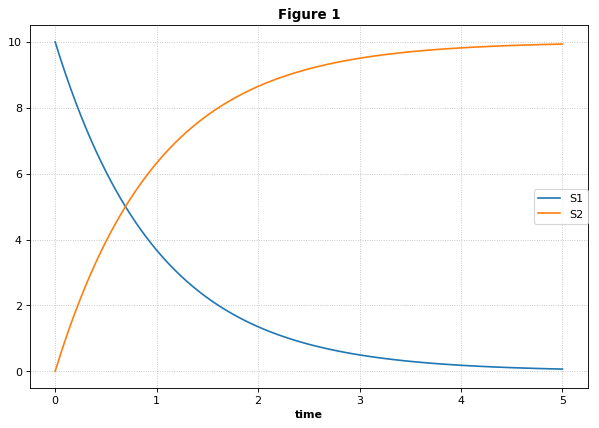

{'c:\\users\\kirich~1\\appdata\\local\\temp\\tmpbllk1j\\main.xml': {'code': u'r"""\n####################################################################################################\n                            tellurium 2.0.12\n-+++++++++++++++++-         Python Environment for Modeling and Simulating Biological Systems\n .+++++++++++++++.\n  .+++++++++++++.           Homepage:      http://tellurium.analogmachine.org/\n-//++++++++++++/.   -:/-`   Documentation: https://tellurium.readthedocs.io/en/latest/index.html\n.----:+++++++/.++  .++++/   Forum:         https://groups.google.com/forum/#!forum/tellurium-discuss\n      :+++++:  .+:` .--++   Bug reports:   https://github.com/sys-bio/tellurium/issues\n       -+++-    ./+:-://.   Repository:    https://github.com/sys-bio/tellurium\n        .+.       `...`\n\nSED-ML simulation experiments: http://www.sed-ml.org/\n    sedmlDoc: L1V2  \n    inputType:      \'SEDML_FILE\'\n    workingDir:     \'c:\\users\\kirich~1\\appdata\\local\\temp\

In [2]:
te.executeCombineArchive(os.path.join(workingDir, 'archive.omex'))